In [19]:
'''

@author: Ishan Mohanty
EE 599: Deep Learning and its Applications

'''

import h5py
import numpy as np
import matplotlib.pyplot as plt

In [20]:
f = h5py.File('C:/Users/ishan/OneDrive/Desktop/EE 599/HW/HW2/lms_fun_v3.hdf5','r')      
print(list(f.keys()))

['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']


In [21]:
dsNames = []
for allkeys in f.keys():
    print(allkeys)
    dsNames.append(allkeys)

matched_10_v
matched_10_x
matched_10_y
matched_10_z
matched_3_v
matched_3_x
matched_3_y
matched_3_z
mismatched_v
mismatched_x
mismatched_y
timevarying_coefficents
timevarying_v
timevarying_x
timevarying_y
timevarying_z


In [22]:
dset = []
i = 0
for allkeys in f.keys():
    dset.append(f.get(allkeys))
    dset[i] = np.array(dset[i])
    i+=1

In [23]:
for x in range(len(dset)):
    print("shape and type of :",dsNames[x])
    print(dset[x].shape,dset[x].dtype,sep = " --- ")
    print()

shape and type of : matched_10_v
(600, 501, 3) --- float64

shape and type of : matched_10_x
(600, 501) --- float64

shape and type of : matched_10_y
(600, 501) --- float64

shape and type of : matched_10_z
(600, 501) --- float64

shape and type of : matched_3_v
(600, 501, 3) --- float64

shape and type of : matched_3_x
(600, 501) --- float64

shape and type of : matched_3_y
(600, 501) --- float64

shape and type of : matched_3_z
(600, 501) --- float64

shape and type of : mismatched_v
(600, 501, 3) --- float64

shape and type of : mismatched_x
(600, 501) --- float64

shape and type of : mismatched_y
(600, 501) --- float64

shape and type of : timevarying_coefficents
(501, 3) --- float64

shape and type of : timevarying_v
(501, 3) --- float64

shape and type of : timevarying_x
(501,) --- float64

shape and type of : timevarying_y
(501,) --- float64

shape and type of : timevarying_z
(501,) --- float64



In [24]:
def plotting(title,plot_coeff,y_label,x_label):
    plt.title(title)
    plt.plot(plot_coeff)  
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()  

In [25]:
'''
The LMS Adaptive Algorithm using online learning
'''

def lms_adaptive_algorithm(eta,vn,zn,flag):
    w_all_seq = np.zeros( shape = ( zn.shape[1]+1 , 3 ) )
    w_seq = np.zeros( shape = ( zn.shape[1]+1 , 3 ) )
    mse_all_seq = np.zeros( shape = ( zn.shape[1]+1 , 1 ) )
    mse_seq = np.zeros( shape =( zn.shape[1]+1 , 1 ) )
    w_first_exp = np.zeros( shape = ( zn.shape[1]+1 , 3 ) )
    mse_first_exp = np.zeros( shape = (zn.shape[1]+1,1))
    for i in range(zn.shape[0]):
        w_all_seq = np.add(w_all_seq,w_seq)
        mse_all_seq = np.add(mse_all_seq,mse_seq)
        w = np.zeros( shape = (3,) )
        error = np.zeros( shape = (1,) )
        error_samples = np.zeros( shape = (1,) )
        w_seq = np.zeros( shape = (3,) )
        mse_seq = np.zeros( shape = (1,) )
        for j in range(zn.shape[1]):
            error = zn[i,j]- np.dot(w,vn[i,j,:])
            w += ( eta*(error)*(vn[i,j,:]) )
            mse_seq = np.vstack((mse_seq,error*error))
            w_seq = np.vstack((w_seq,w))
            if i == 0:
                w_first_exp = w_seq
                mse_first_exp = mse_seq
                
    mse_all_seq = mse_all_seq/600.0
    w_all_seq = w_all_seq/600.0
    
    if flag == 0:    
        plotting('coefficients',w_first_exp,'W Estimates for single sequence','Updates')
        plotting('learning curve',mse_first_exp[1:502],'MSE(not in db) first sequence','Updates')
        mse_db = 10*np.log10(mse_first_exp)
        plotting('learning curve',mse_db[1:502],'MSE(in db) first sequence','Updates')
    else:
        plotting('coefficients',w_all_seq,'W Estimates for 600 sequences','Updates')
        plotting('learning curve',mse_all_seq[1:502],'MSE(not in db)','Updates')
        mse_all_db = 10*np.log10(mse_all_seq)
        plotting('learning curve',mse_all_db[1:502],'MSE(db)','Updates')
        print("MSE value",mse_all_seq[500])

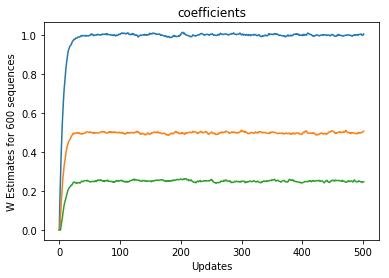

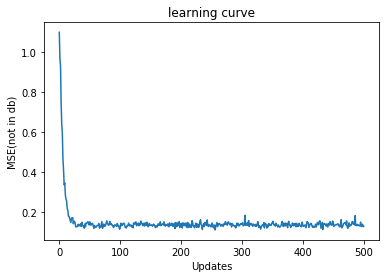

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


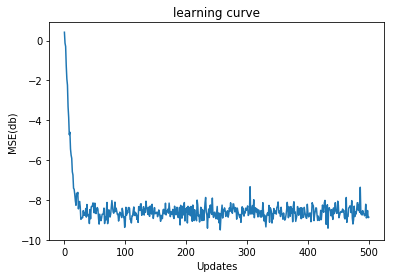

MSE value [0.12933561]


In [26]:
# matched 10 - one run eta:0.05
lms_adaptive_algorithm(0.15,dset[0],dset[3],1)

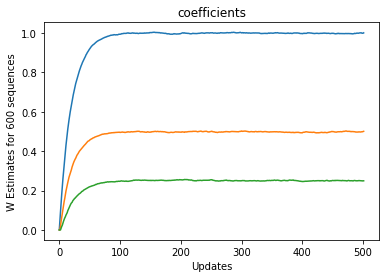

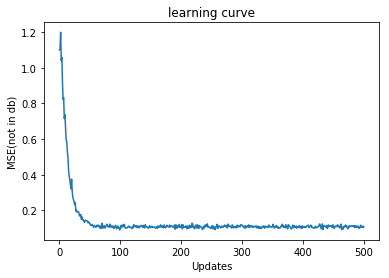

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


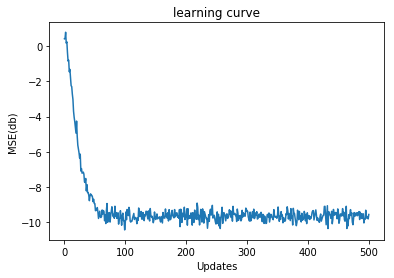

MSE value [0.10429825]


In [27]:
# matched 10 - 600 sequences, eta=0.05
lms_adaptive_algorithm(0.05,dset[0],dset[3],1)

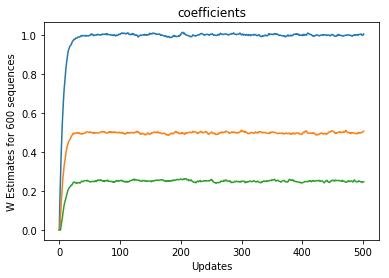

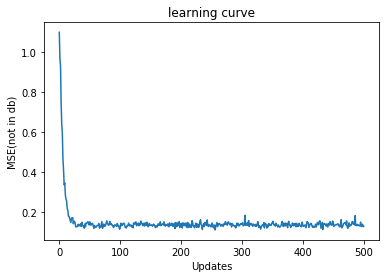

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


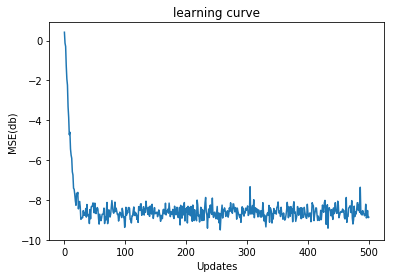

MSE value [0.12933561]


In [28]:
# matched 10 - one run - eta:0.15
lms_adaptive_algorithm(0.15,dset[0],dset[3],1)

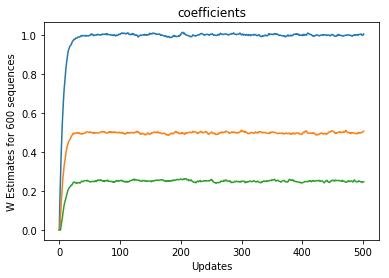

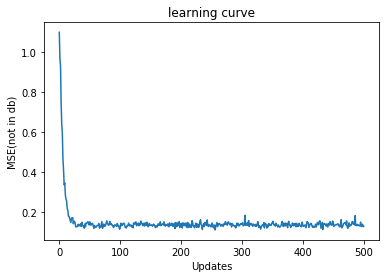

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


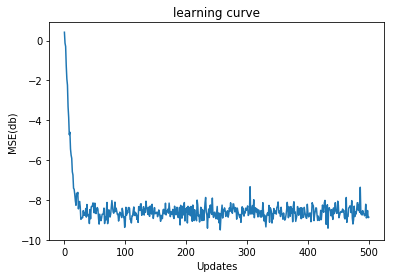

MSE value [0.12933561]


In [29]:
# matched 10 - 600 seq - eta:0.15
lms_adaptive_algorithm(0.15,dset[0],dset[3],1)

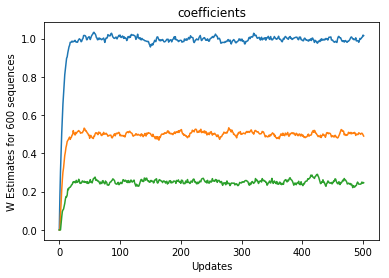

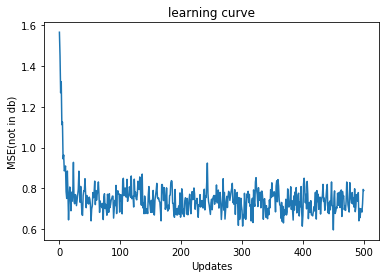

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


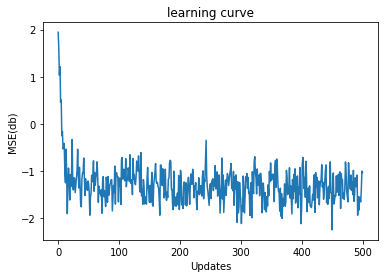

MSE value [0.79513656]


In [30]:
# matched 3 - one run eta:0.05
lms_adaptive_algorithm(0.17,dset[4],dset[7],1)

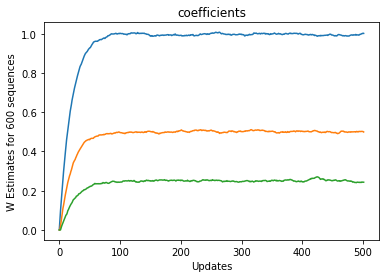

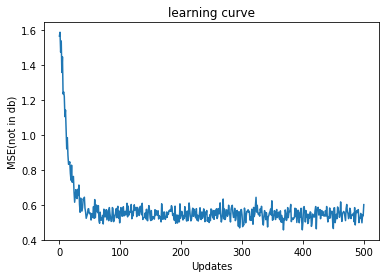

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


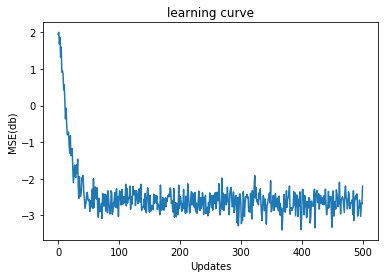

MSE value [0.53790876]


In [31]:
# matched 3 - 600 runs eta:0.05
lms_adaptive_algorithm(0.05,dset[4],dset[7],1)

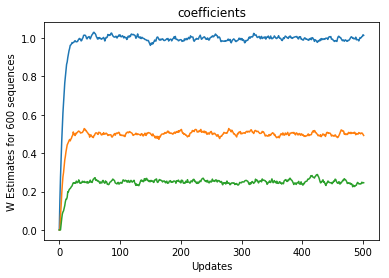

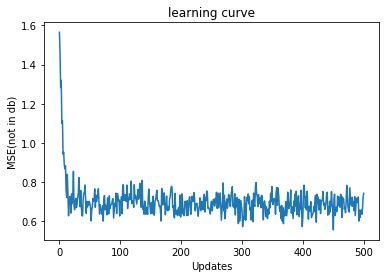

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


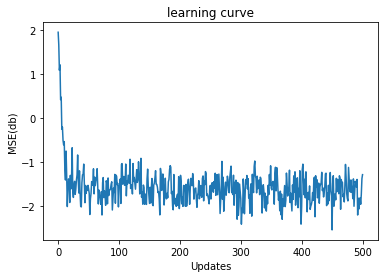

MSE value [0.72727479]


In [32]:
# matched 3 - one run - eta:0.15
lms_adaptive_algorithm(0.15,dset[4],dset[7],1)

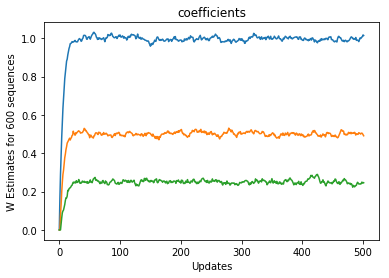

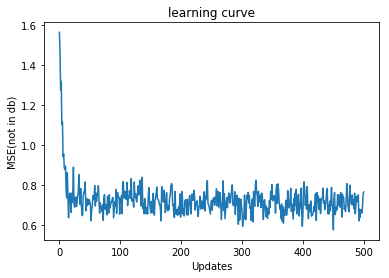

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


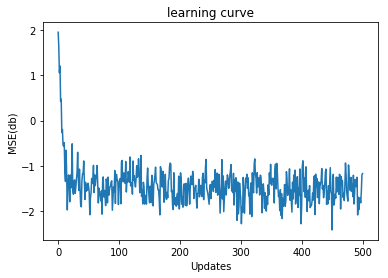

MSE value [0.75905631]


In [33]:
# matched 3 - 600 runs - eta:0.15
lms_adaptive_algorithm(0.16,dset[4],dset[7],1)

In [42]:
def lms(eta,vn,zn):
    w = np.zeros(shape=(3,))
    mse_seq = np.zeros(shape=(1,))
    w_seq = np.zeros(shape=(3,))
    for i in range(zn.shape[0]):
            error = zn[i]- np.dot(w,vn[i,:])
            w += ( eta*(error)*(vn[i,:]) )
            mse_seq = np.vstack((mse_seq,error*error))
            w_seq = np.vstack((w_seq,w))
    print(w_seq.shape)
    print(mse_seq.shape)
    plt.plot(w_seq[1:502])  
    plt.ylabel('estimated Coefficients')
    plt.xlabel('Updates')
    plt.plot(dset[11])  
    plt.ylabel('True and esimated Coefficients')
    plt.xlabel('Updates')
    plt.show()
    print()
    print()
    plt.plot(mse_seq[1:502])  
    plt.ylabel('mse for estimated weights')
    plt.xlabel('Updates')
    plt.show()
    print()
    mse_db = np.log10(mse_seq)
    mse_db = 10*mse_db
    plt.plot(mse_db)  
    plt.ylabel('mse DB for estimated weights')
    plt.xlabel('Updates')
    plt.show()
    return w_seq

timevarying_coefficents


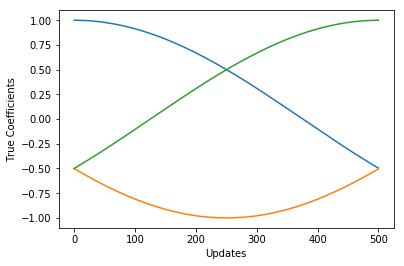

(501, 3)


In [43]:
print(dsNames[11])
plt.plot(dset[11])  
plt.ylabel('True Coefficients')
plt.xlabel('Updates')
plt.show()
print(dset[11].shape)

In [44]:
vn = dset[12]
print(dsNames[12])
print(vn.shape)
zn = dset[15]
zn = zn[0:501]
print(zn.shape)
print(dsNames[15])

timevarying_v
(501, 3)
(501,)
timevarying_z


(502, 3)
(502, 1)


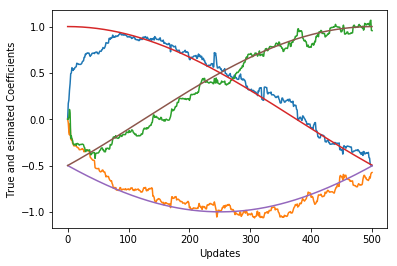

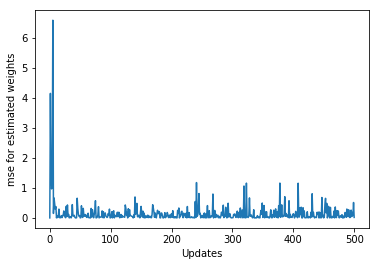

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


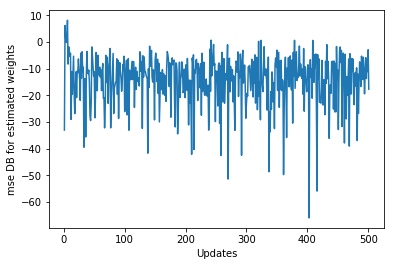

(502, 3)
(502, 1)


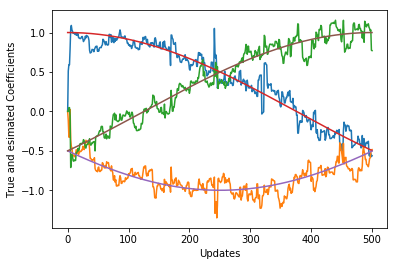

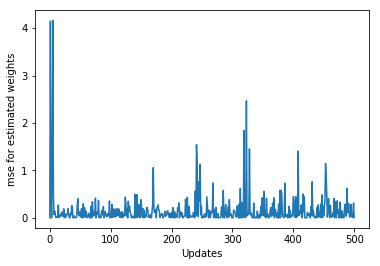

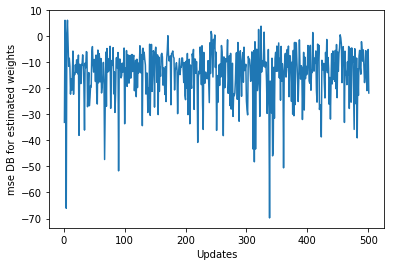

(501, 3)


In [45]:
w_est = lms(0.05,vn,zn)
w_est = lms(0.15,vn,zn)
print(w_est[1:502,:].shape)

(502, 3)
(502, 1)


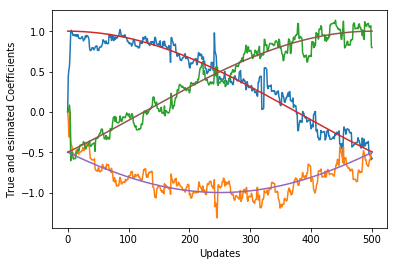

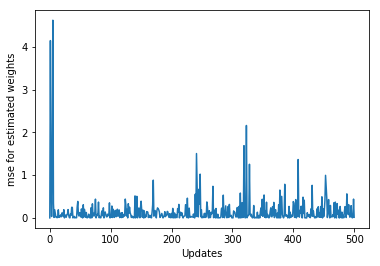

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


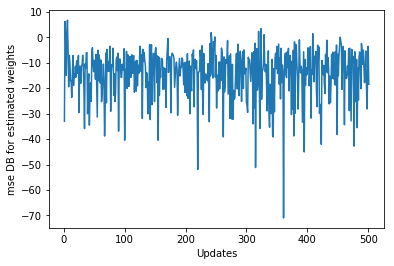

In [46]:
w_est = lms(0.13,vn,zn)

0.03   0.0
(502, 3)
(502, 1)


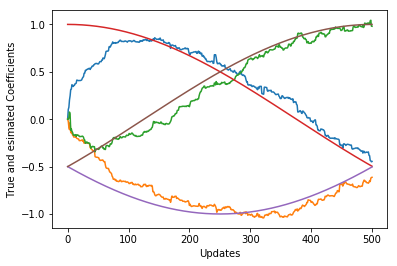

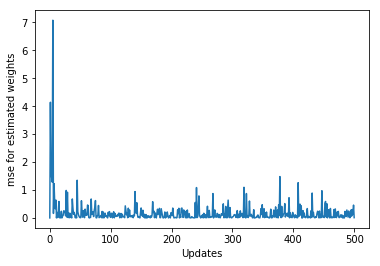

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


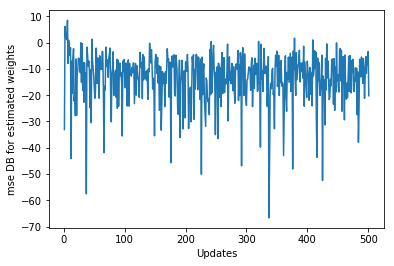

0.04   3.0535566486030534e-05
(502, 3)
(502, 1)


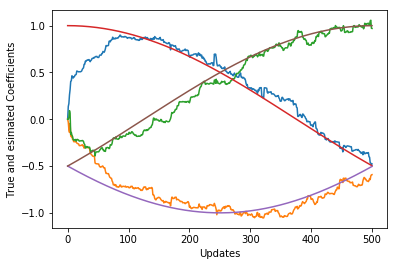

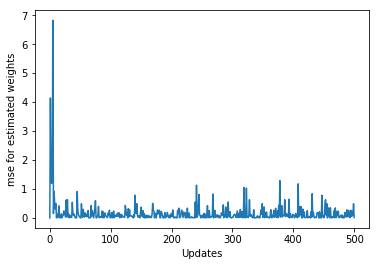

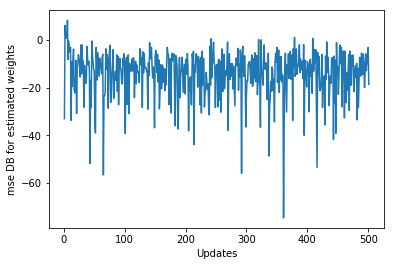

0.05   1.9767312073441818e-05
(502, 3)
(502, 1)


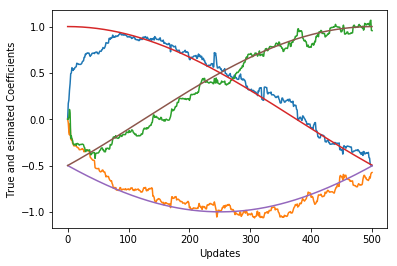

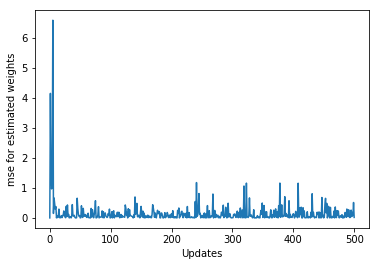

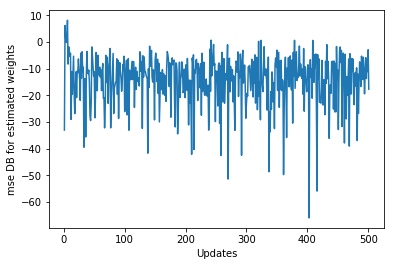

0.060000000000000005   1.810426106894564e-05
(502, 3)
(502, 1)


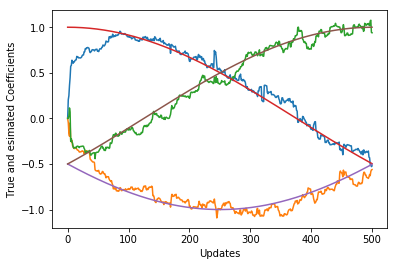

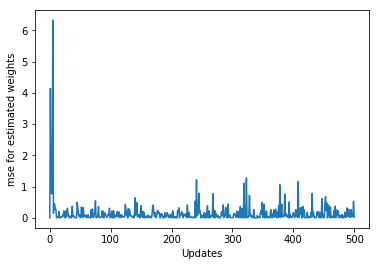

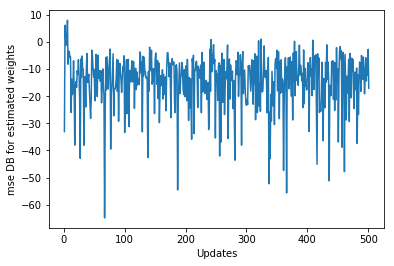

0.07   2.277898773263623e-05
(502, 3)
(502, 1)


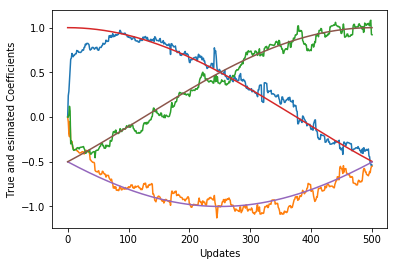

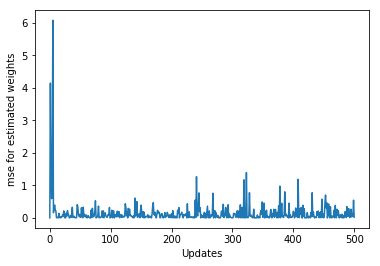

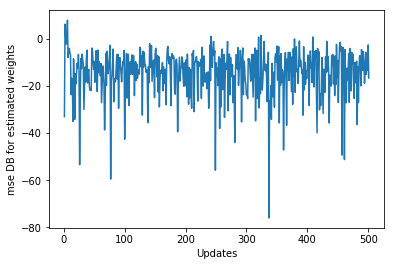

0.08000000000000002   3.3101112971594e-05
(502, 3)
(502, 1)


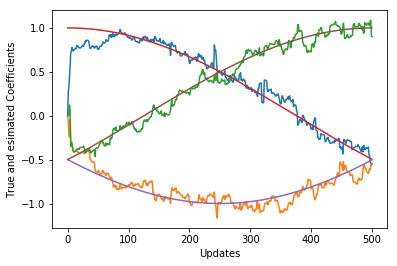

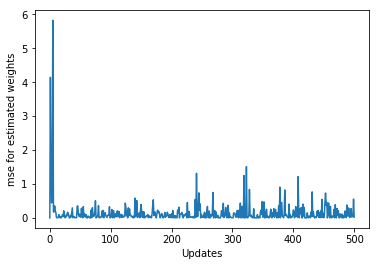

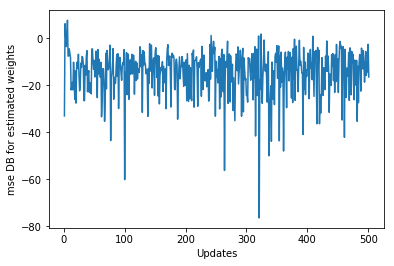

0.09000000000000001   4.872239555272887e-05
(502, 3)
(502, 1)


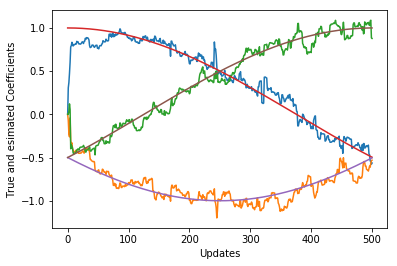

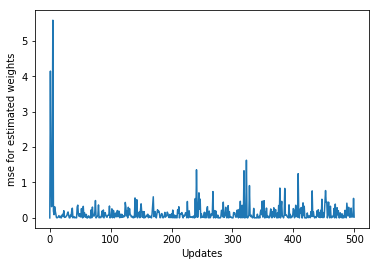

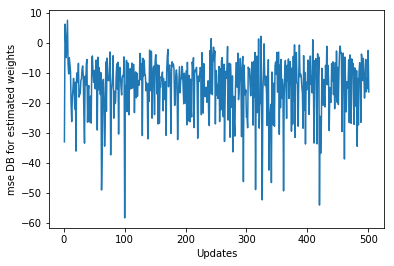

0.1   6.921189127311843e-05
(502, 3)
(502, 1)


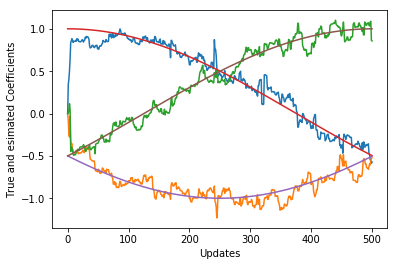

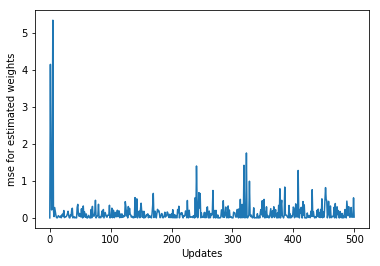

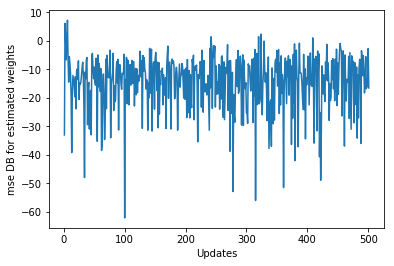

0.11000000000000001   9.385863394861932e-05
(502, 3)
(502, 1)


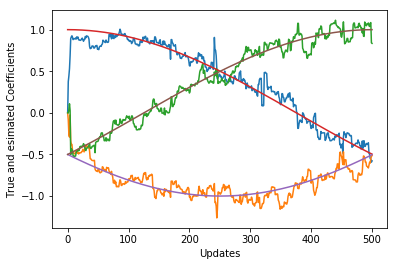

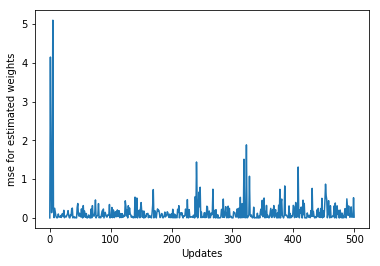

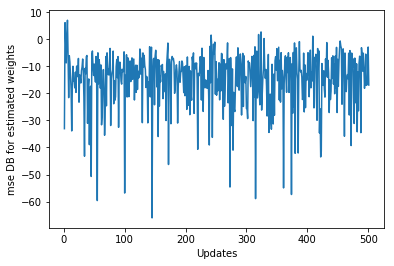

0.12000000000000002   0.00012150892770565728
(502, 3)
(502, 1)


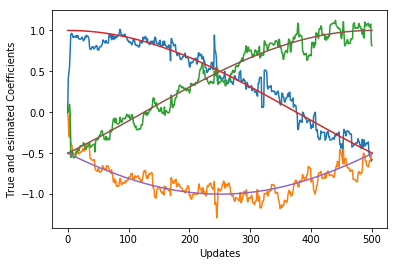

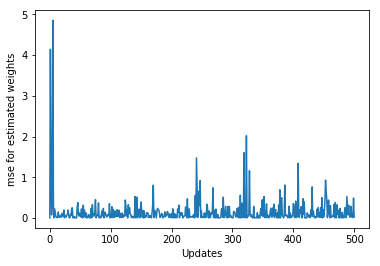

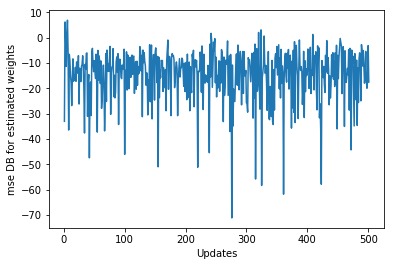

0.13   0.0001504418867293938
(502, 3)
(502, 1)


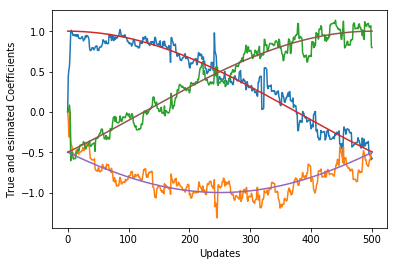

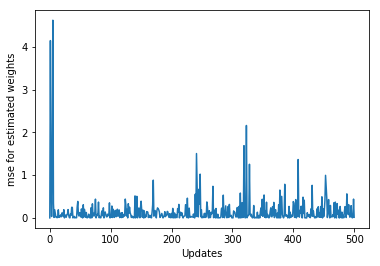

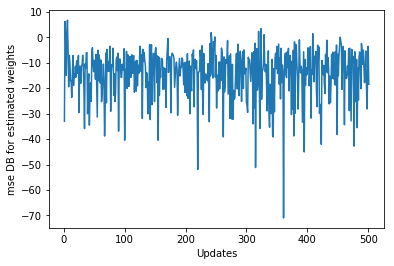

0.14   0.0001783325117588651
(502, 3)
(502, 1)


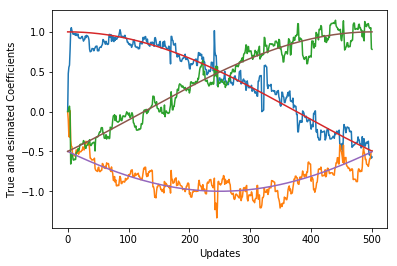

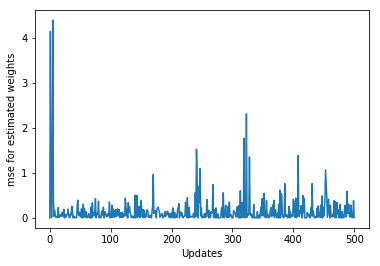

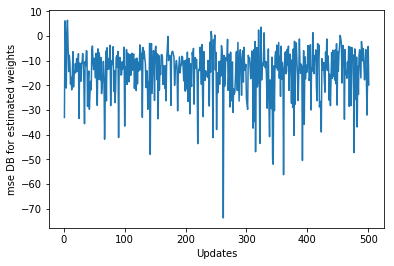

0.15000000000000002   0.00020234804467167178
(502, 3)
(502, 1)


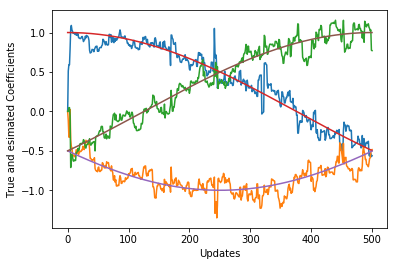

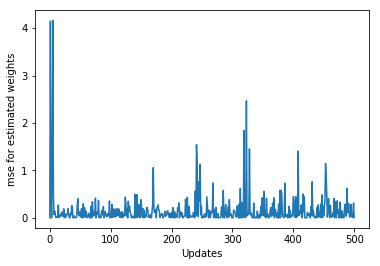

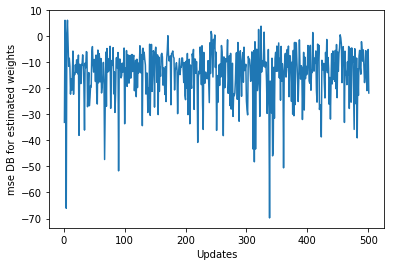

0.16000000000000003   0.00021939995179213106
(502, 3)
(502, 1)


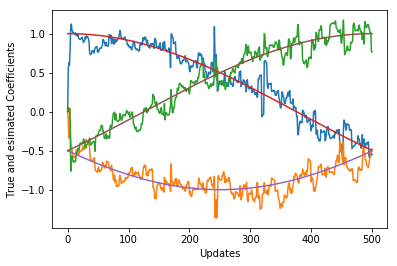

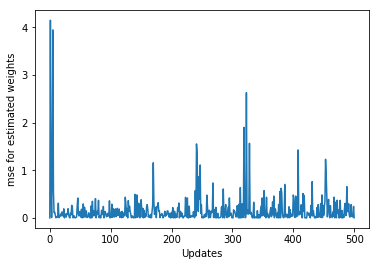

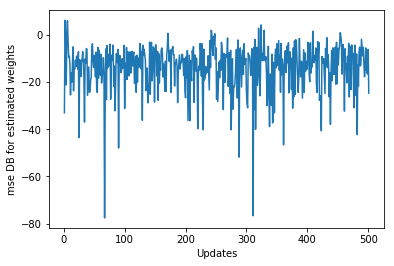

0.17   0.0002265451144972829
(502, 3)
(502, 1)


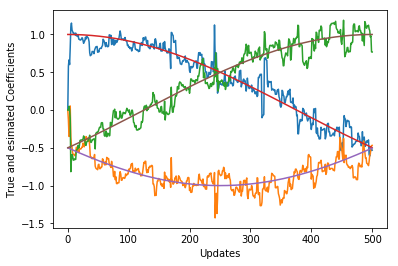

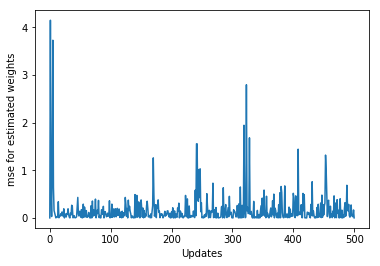

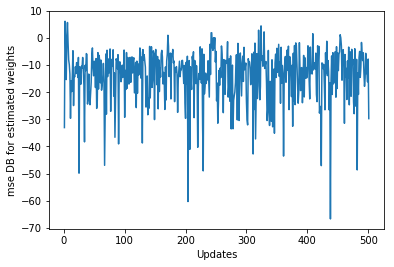

0.18000000000000002   0.0002215068913266454
(502, 3)
(502, 1)


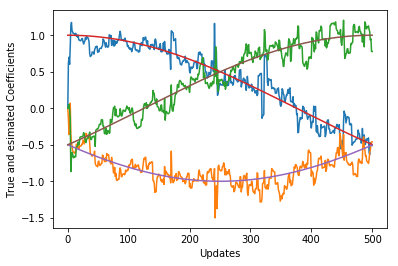

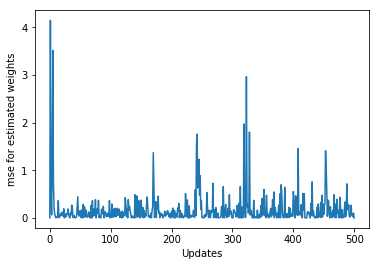

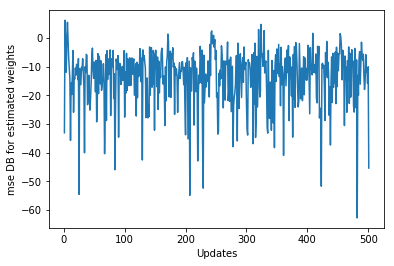

0.19000000000000003   0.0002032780936296961
(502, 3)
(502, 1)


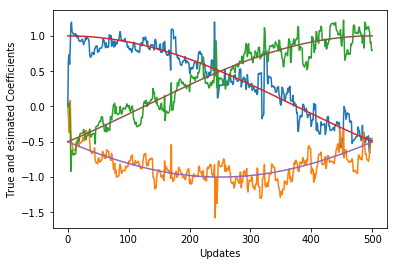

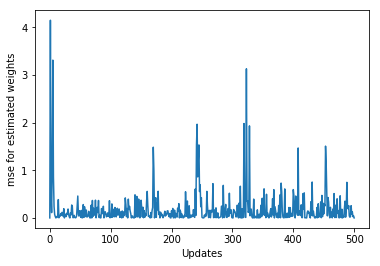

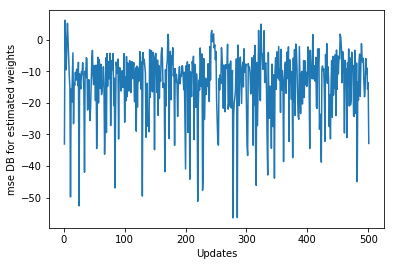

In [47]:
new_w = np.zeros(shape=(501,3))
true_w = dset[11]
sum = 0
for i in np.arange(0.03,0.20,0.01): 
    print(i," ",sum/501)
    est_w = lms(i,vn,zn)
    new_w = est_w[1:502,:]
    sum = 0
    for k in range(501):   
        for j in range(3):
            if j==0:
                sum = 0
            if j==2:
                sum+= np.square(new_w[k,j]-true_w[k,j])
                sum = sum
            sum+= np.square(new_w[k,j]-true_w[k,j])
    

(600, 501)


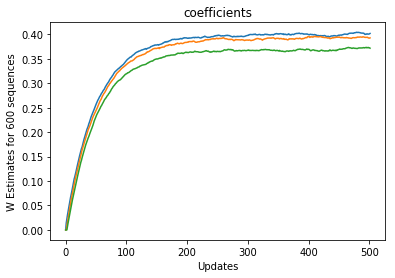

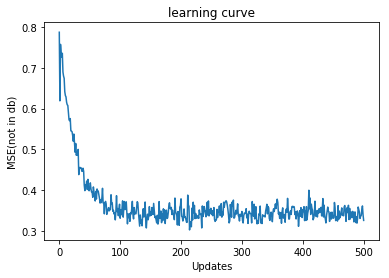

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


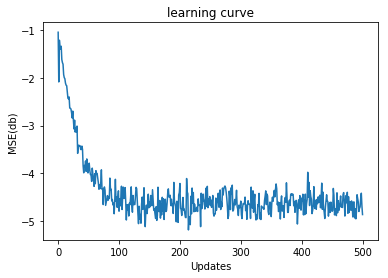

MSE value [0.33944504]


In [41]:
mis_vn = dset[8]
mis_xn = dset[9]
mis_yn = dset[10]
print(mis_yn.shape)
lms_adaptive_algorithm(0.02,mis_vn,mis_yn,1)

In [48]:
### Rvn, r
new_mis_vn = mis_vn.reshape(300600,3)
Rvn = np.matmul(new_mis_vn.T,new_mis_vn)
Rvn = Rvn/300600
print(Rvn)

[[ 1.00045756e+00 -5.39002475e-04  1.86487799e-03]
 [-5.39002475e-04  9.98711657e-01 -6.55304895e-04]
 [ 1.86487799e-03 -6.55304895e-04  9.96783998e-01]]


In [49]:
new_mis_yn = mis_yn.reshape(300600,1)
rn = np.matmul(new_mis_yn.T,new_mis_vn)
rn = rn/300600
print(rn)

[[0.401296   0.38678905 0.3700655 ]]


In [50]:
Rvn_I = np.linalg.inv(Rvn)
residual = np.matmul(rn,Rvn_I)
print(residual)
print(rn.shape)
final_residual = np.matmul(residual,rn.T)
print(final_residual)

[[0.40063026 0.38774751 0.37076485]]
(1, 3)
[[0.44795509]]


In [51]:
wllse = np.matmul(rn,Rvn_I)
print(wllse.shape)
res = np.matmul(new_mis_vn,wllse.T)
print(res.shape)
print(new_mis_yn.shape)

(1, 3)
(300600, 1)
(300600, 1)


In [54]:
norm_l2 = np.subtract(new_mis_yn,res)
print(norm_l2)
print(norm_l2.shape)
final_norm = norm_l2*norm_l2
print(final_norm)
print(final_norm.shape)
f_norm = np.sum(final_norm)
print(f_norm)
f_new = f_norm/300600
print(f_new)
print(10*np.log10(f_new),"db")

[[-0.47016096]
 [-0.07436447]
 [ 0.58149201]
 ...
 [-0.70812836]
 [-0.29093331]
 [-0.41158375]]
(300600, 1)
[[0.22105132]
 [0.00553007]
 [0.33813296]
 ...
 [0.50144577]
 [0.08464219]
 [0.16940119]]
(300600, 1)
99532.55100467145
0.33111294412731684
-4.80023841135023 db


In [55]:
print(10*np.log10(0.5),"db")

-3.010299956639812 db


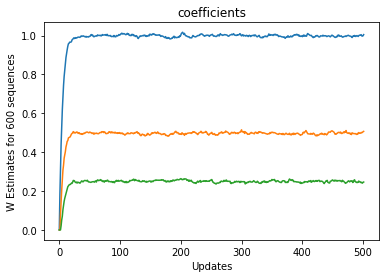

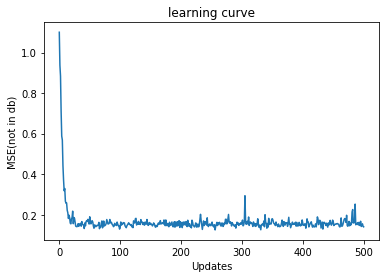

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


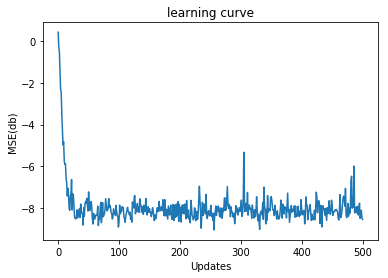

MSE value [0.14255245]


In [56]:
lms_adaptive_algorithm(0.18,dset[0],dset[3],1)